# Student Admission Prediction using Logistic Regression

## 1. Load the dataset

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [17]:
data = pd.read_csv("student_admission_dataset.csv")
data.head()

,GPA,SAT_Score,Extracurricular_Activities,Admission_Status
0,3.46,1223,8,Rejected
1,2.54,974,8,Rejected
2,2.91,909,9,Rejected
3,2.83,1369,5,Accepted
4,3.60,1536,7,Accepted


In [18]:
data.shape

(250, 4)

In [19]:
data.isna().sum()

GPA                           0
SAT_Score                     0
Extracurricular_Activities    0
Admission_Status              0
dtype: int64

In [20]:
data.duplicated().sum()

0

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GPA                         250 non-null    float64
 1   SAT_Score                   250 non-null    int64  
 2   Extracurricular_Activities  250 non-null    int64  
 3   Admission_Status            250 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 7.9+ KB


In [22]:
data['Admission_Status']= data['Admission_Status'].astype('category')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   GPA                         250 non-null    float64 
 1   SAT_Score                   250 non-null    int64   
 2   Extracurricular_Activities  250 non-null    int64   
 3   Admission_Status            250 non-null    category
dtypes: category(1), float64(1), int64(2)
memory usage: 6.4 KB


In [25]:
data.describe()

,GPA,SAT_Score,Extracurricular_Activities
count,250.000000,250.000000,250.000000
mean,3.238320,1250.432000,5.204000
std,0.438607,204.733163,2.964716
min,2.500000,900.000000,0.000000
25%,2.850000,1080.250000,3.000000
50%,3.230000,1237.000000,5.000000
75%,3.590000,1426.000000,7.750000
max,4.000000,1598.000000,10.000000


## A. Numerical Features

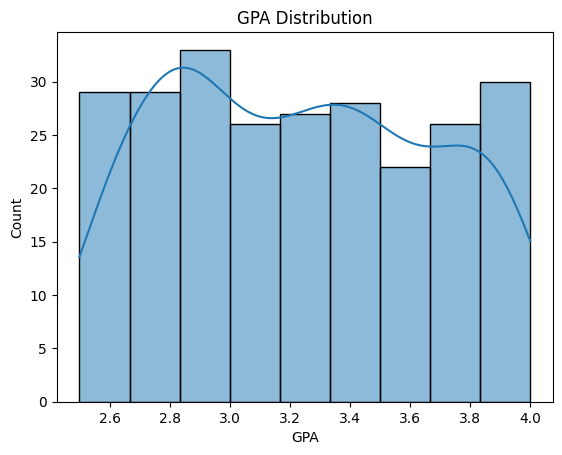

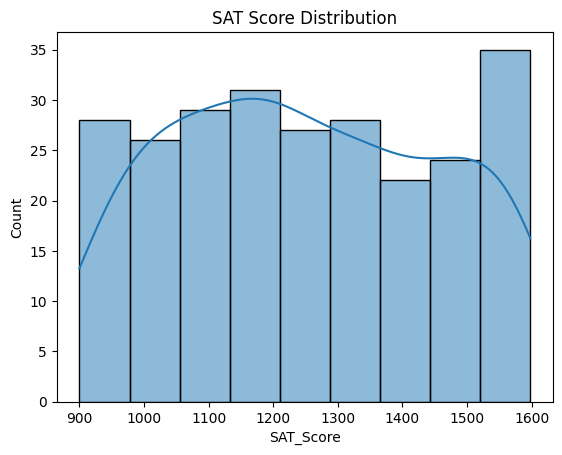

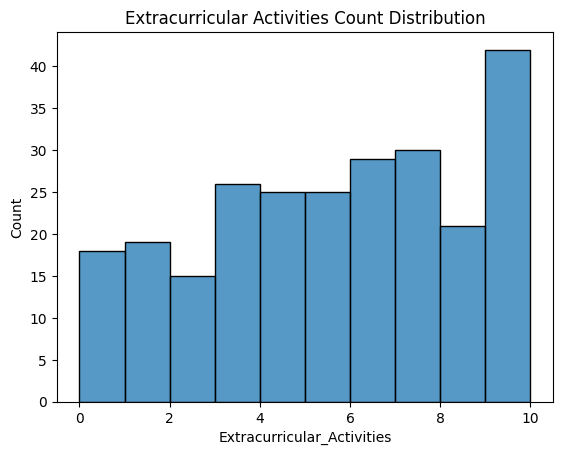

In [27]:
# GPA distribution
sns.histplot(data['GPA'], kde=True)
plt.title('GPA Distribution')
plt.show()

# SAT Score distribution
sns.histplot(data['SAT_Score'], kde=True)
plt.title('SAT Score Distribution')
plt.show()

# Extracurricular Activities distribution
sns.histplot(data['Extracurricular_Activities'], bins=10, kde=False)
plt.title('Extracurricular Activities Count Distribution')
plt.show()

## B. Categorical Feature

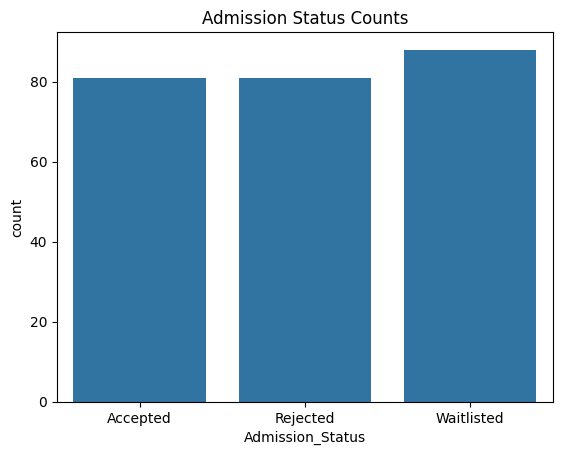

In [29]:
sns.countplot(data=data, x='Admission_Status')
plt.title('Admission Status Counts')
plt.show()

## GPA vs Admission Status

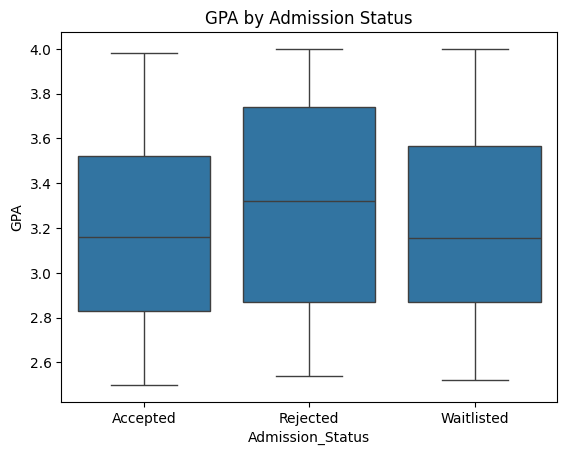

In [30]:
sns.boxplot(data=data, x='Admission_Status', y='GPA')
plt.title('GPA by Admission Status')
plt.show()

## SAT Score vs Admission Status

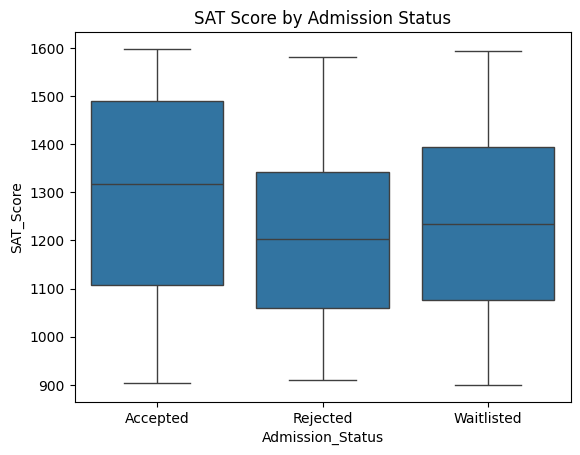

In [31]:
sns.boxplot(data=data, x='Admission_Status', y='SAT_Score')
plt.title('SAT Score by Admission Status')
plt.show()

## Extracurricular Activities vs Admission Status

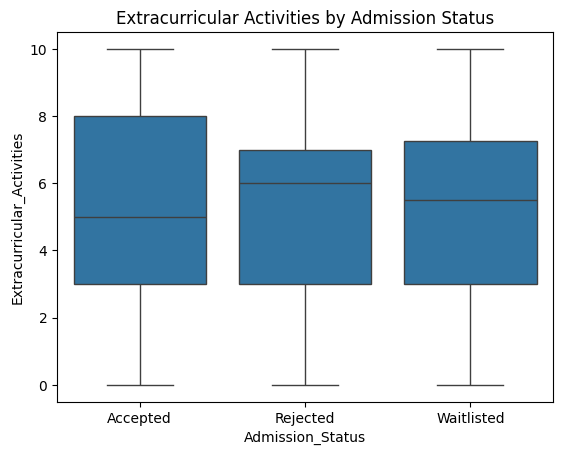

In [32]:
sns.boxplot(data=data, x='Admission_Status', y='Extracurricular_Activities')
plt.title('Extracurricular Activities by Admission Status')
plt.show()

## Correlation Analysis

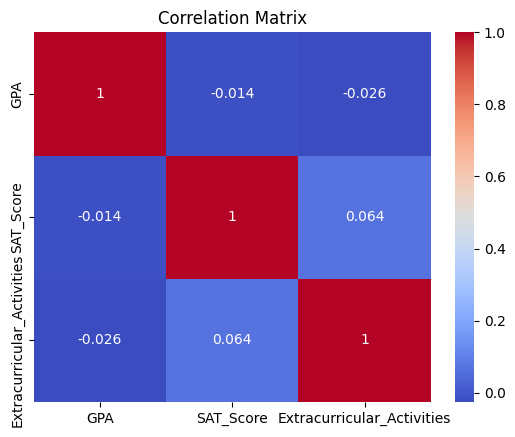

In [33]:
corr = data[['GPA', 'SAT_Score', 'Extracurricular_Activities']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [34]:
data['Admission_Status'].unique()

['Rejected', 'Accepted', 'Waitlisted']
Categories (3, object): ['Accepted', 'Rejected', 'Waitlisted']

In [36]:
data['Admission_Status_cat'] = data['Admission_Status'].cat.codes

# Mapping
label_mapping = dict(enumerate(data['Admission_Status'].cat.categories))
print("Label mapping:", label_mapping)

Label mapping: {0: 'Accepted', 1: 'Rejected', 2: 'Waitlisted'}


In [38]:
from sklearn.preprocessing import StandardScaler
#Define features and labels
X = data[['GPA', 'SAT_Score', 'Extracurricular_Activities']]
y = data['Admission_Status_cat']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [40]:
#Train Multinomial Logistic Regression with Hyperparameter Tuning

model = LogisticRegression(multi_class='multinomial', max_iter=1000)
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'newton-cg']  # Solvers that support multinomial
}

grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

C:\Users\bbuser\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\bbuser\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\bbuser\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\bbuser\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in ve

Best Parameters: {'C': 1, 'solver': 'lbfgs'}


C:\Users\bbuser\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [44]:
#Model Evaluation
y_pred = best_model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.42
